In [1]:
from reactionmodel.model import Species, Reaction, Model
import numpy as np
from numba import jit

X = Species('X')

@jit(nopython=True)
def k(t):
    return np.array([t])

r = Reaction([X], [], k=k)

m = Model([X], [r])

In [2]:
import hybrid.parse as parse

sf = parse.PreconfiguredSimulatorLoader.load_preconfigured('hr_original')
simulator = sf.make_simulator(
    m.get_k(jit=True),
    m.stoichiometry(),
    m.kinetic_order(),
)

In [3]:
x0 = 1000
t = np.linspace(0.0, 5.0, 51)
result = simulator.simulate([0.0, 5.0], [x0], rng=np.random.default_rng(), t_eval=t)
result.status_counter

Counter({<HybridStepStatus.stochastic_event: 1>: 84,
         <HybridStepStatus.contrived_no_reaction: 4>: 35,
         <HybridStepStatus.t_end: 0>: 1})

In [4]:
result.restricted_values(t)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 array([[1000.        ,  995.01658959,  981.05899621,  956.83656864,
          924.15093999,  883.37197185,  836.09844958,  782.9996631 ,
          726.20633256,  667.11715576,  606.90259651,  546.4092928 ,
          486.55273638,  429.86991957,  375.58418635,  325.38999696,
          278.65802255,  236.27238898,  197.79529032,  164.57413579,
          135.41708627,  110.31726201,   88.92308054,   69.        ,
           52.        ,   34.        ,   24.        ,   21.        ,
           18.        ,   15.        ,   12.        ,    8.        ,
            6.        ,    5.        ,    3.        ,    3.        ,
            2.        ,    1.        ,    1.        ,    0.        ,
            0.       

In [5]:
from hybrid.hybrid import HybridStepStatus
HybridStepStatus(4)

<HybridStepStatus.contrived_no_reaction: 4>

[]

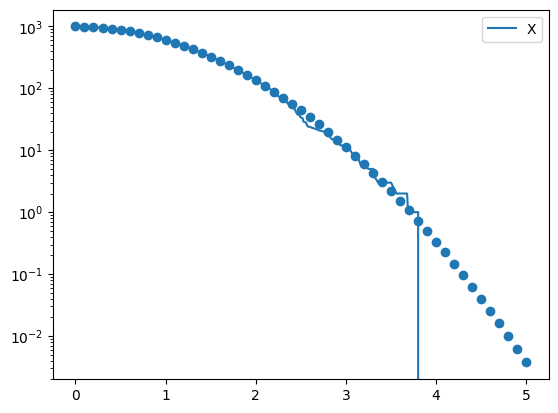

In [8]:
import matplotlib.pyplot as plt
ax = plt.subplot()

result.plot(m.legend(), ax=ax)
y = x0*np.exp(-1/2 * t**2)
ax.scatter(t, y)
ax.semilogy()